Copyright (C)
2016 - 2019 Pinard Liu(liujianping-ok@163.com)

https://www.cnblogs.com/pinard

Permission given to modify the code as long as you keep this declaration at the top

scikit-learn Adaboost类库使用小结 https://www.cnblogs.com/pinard/p/6136914.html

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [30]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, random_state=1)
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为2
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)
#讲两组数据合成一组数据
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

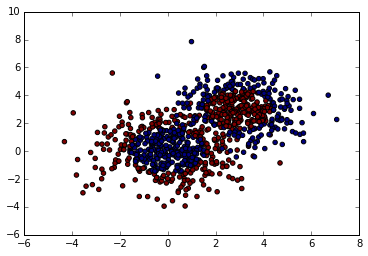

In [31]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [32]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=200, learning_rate=0.8)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.8, n_estimators=200, random_state=None)

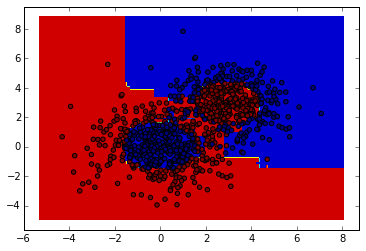

In [34]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [36]:
print "Score:", bdt.score(X,y)

Score: 0.913333333333


In [37]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=300, learning_rate=0.8)
bdt.fit(X, y)
print "Score:", bdt.score(X,y)

Score: 0.962222222222


In [38]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=300, learning_rate=0.5)
bdt.fit(X, y)
print "Score:", bdt.score(X,y)

Score: 0.894444444444


In [41]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=600, learning_rate=0.7)
bdt.fit(X, y)
print "Score:", bdt.score(X,y)

Score: 0.961111111111
